In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

import sys

if ".." not in sys.path:
    sys.path.append("..")

from utils.const import INTEREST_VARS

from utils.plotting import (
    box_plot,
    hist_plot,
    plot_series,
)

In [12]:
norte2 = pd.read_csv(
    "../non_atypical_datasets/NORTE2_2021_2023.csv",
    parse_dates=["date"],
    usecols=INTEREST_VARS,
)
noroeste2 = pd.read_csv(
    "../non_atypical_datasets/NOROESTE2_2021_2023.csv",
    parse_dates=["date"],
    usecols=INTEREST_VARS,
)
sureste3 = pd.read_csv(
    "../non_atypical_datasets/SURESTE3_2021_2023.csv",
    parse_dates=["date"],
    usecols=INTEREST_VARS,
)

sureste3

,date,O3,PM10,PM2.5,PRS,WSR
0,2021-03-01 01:00:00,22.0,50.0,7.0,727.3,3.0
1,2021-03-01 02:00:00,19.0,56.0,7.0,727.3,1.2
2,2021-03-01 03:00:00,8.0,49.0,7.0,727.3,0.7
3,2021-03-01 04:00:00,9.0,80.0,7.0,727.3,1.1
4,2021-03-01 05:00:00,9.0,75.0,7.0,727.5,0.8
...,...,...,...,...,...,...
21594,2023-08-17 19:00:00,36.0,107.0,15.0,727.8,12.7
21595,2023-08-17 20:00:00,29.0,60.0,9.0,728.3,8.9
21596,2023-08-17 21:00:00,26.0,74.0,3.0,728.7,10.5
21597,2023-08-17 22:00:00,25.0,112.0,2.0,729.4,16.9


## Datos sin transformar

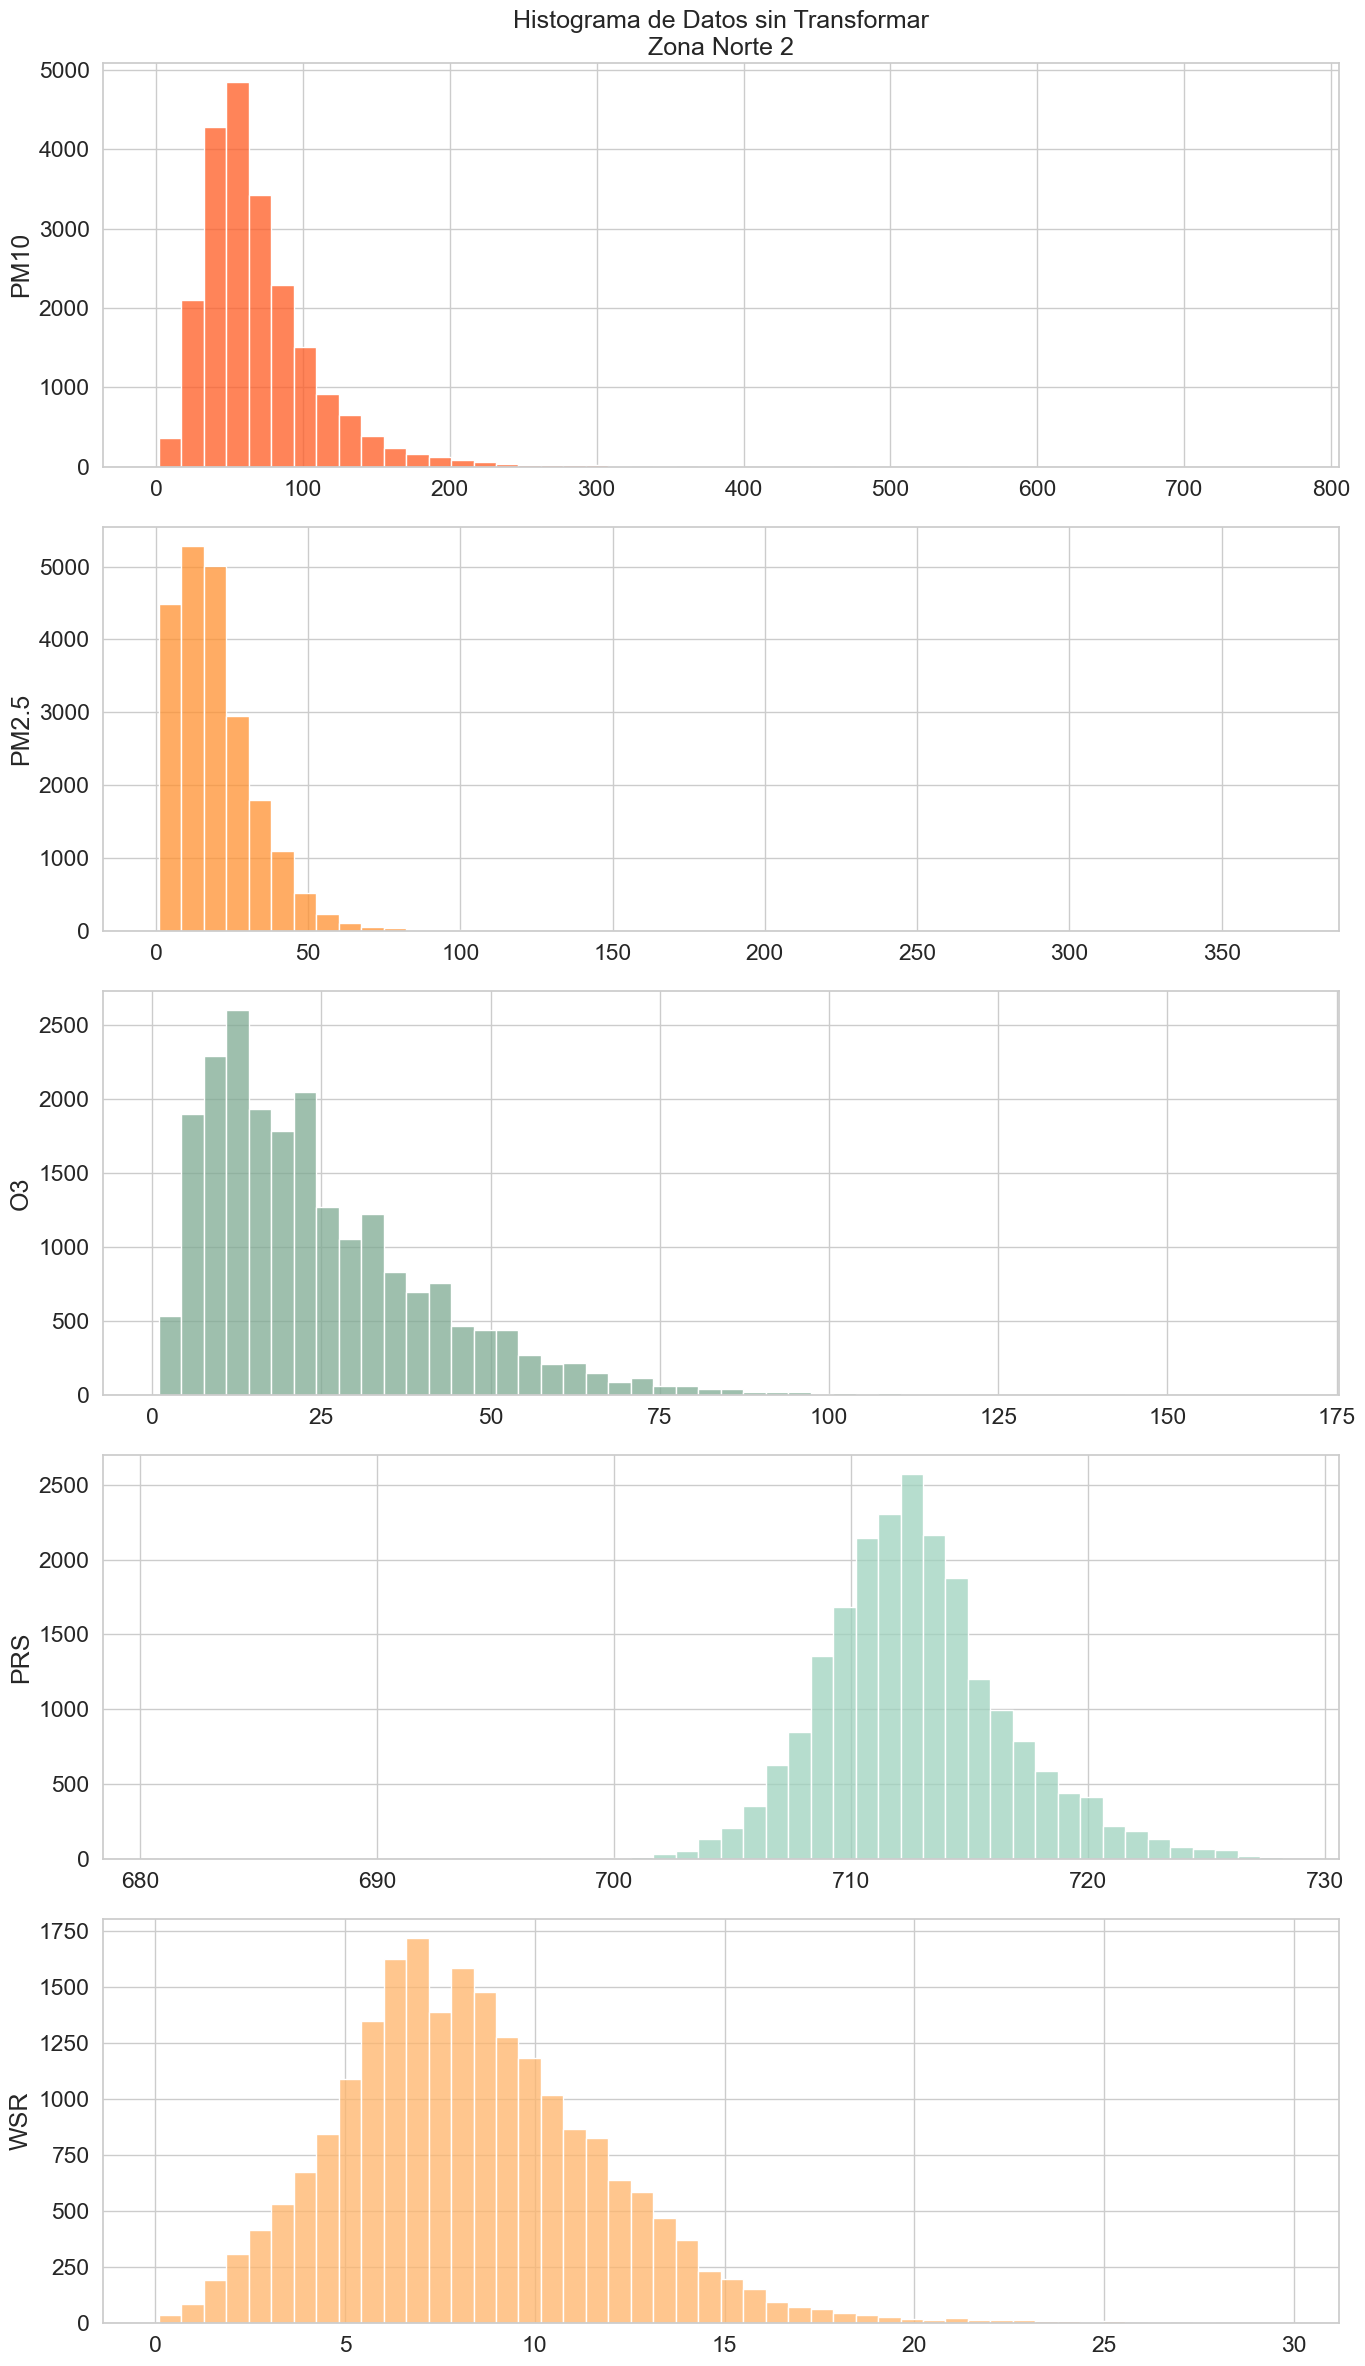

In [13]:
hist_plot(
    norte2,
    interest_vars=INTEREST_VARS,
    title="Histograma de Datos sin Transformar\nZona Norte 2",
)

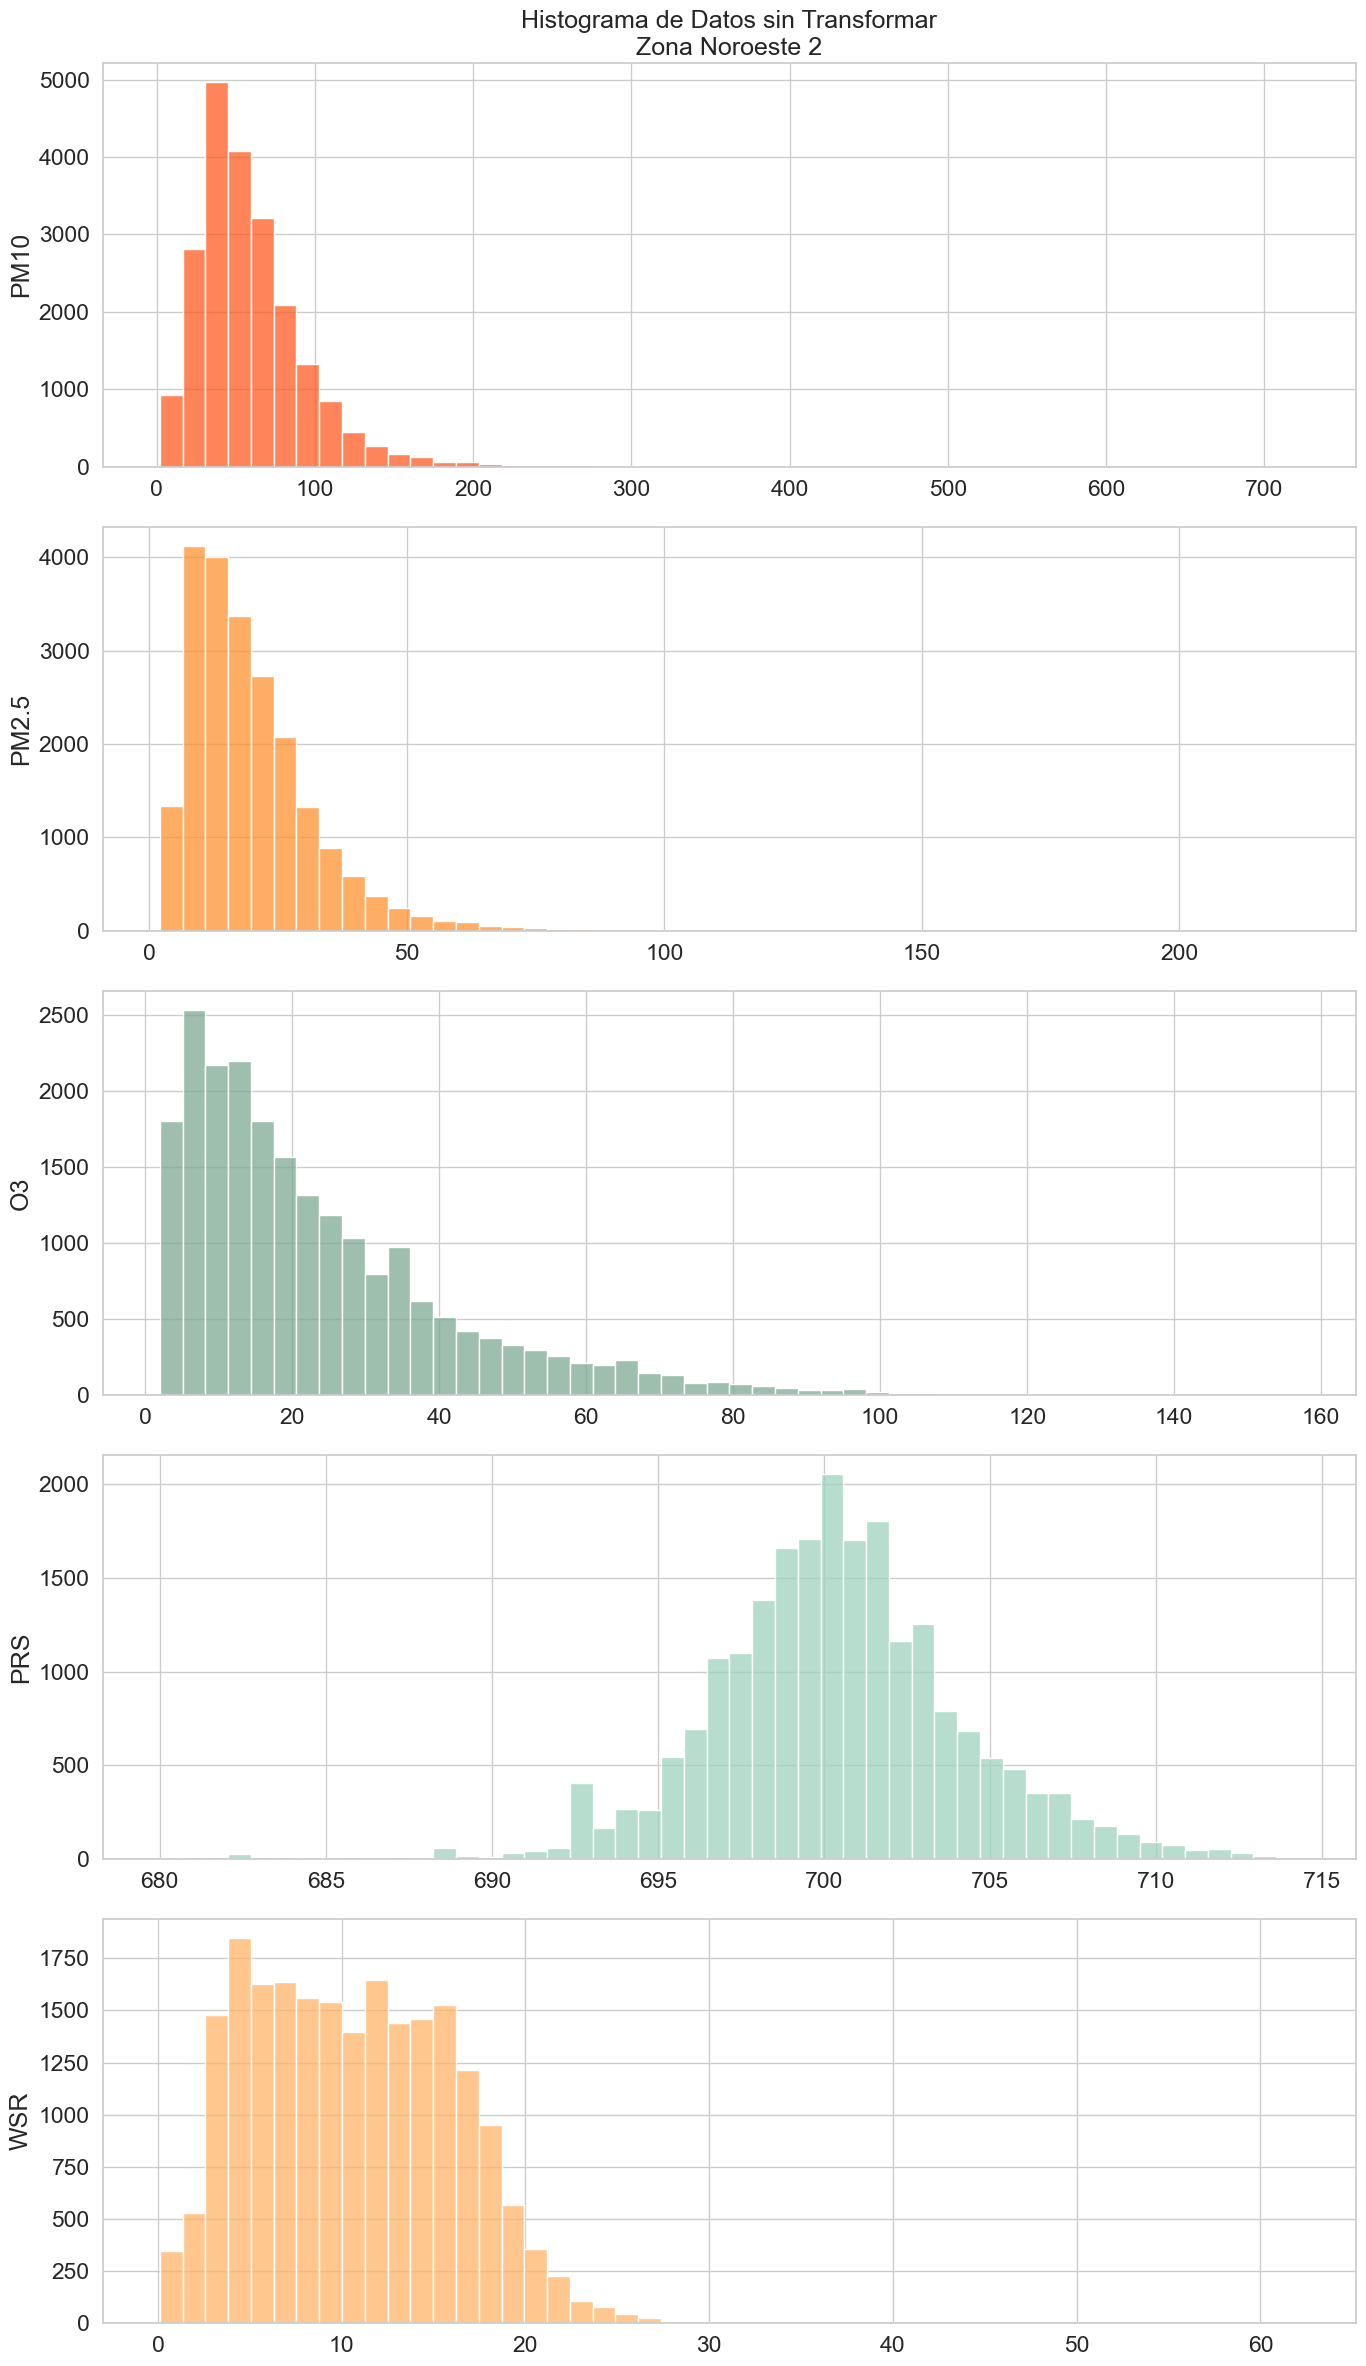

In [4]:
hist_plot(
    noroeste2,
    interest_vars=INTEREST_VARS,
    title="Histograma de Datos sin Transformar\nZona Noroeste 2",
)

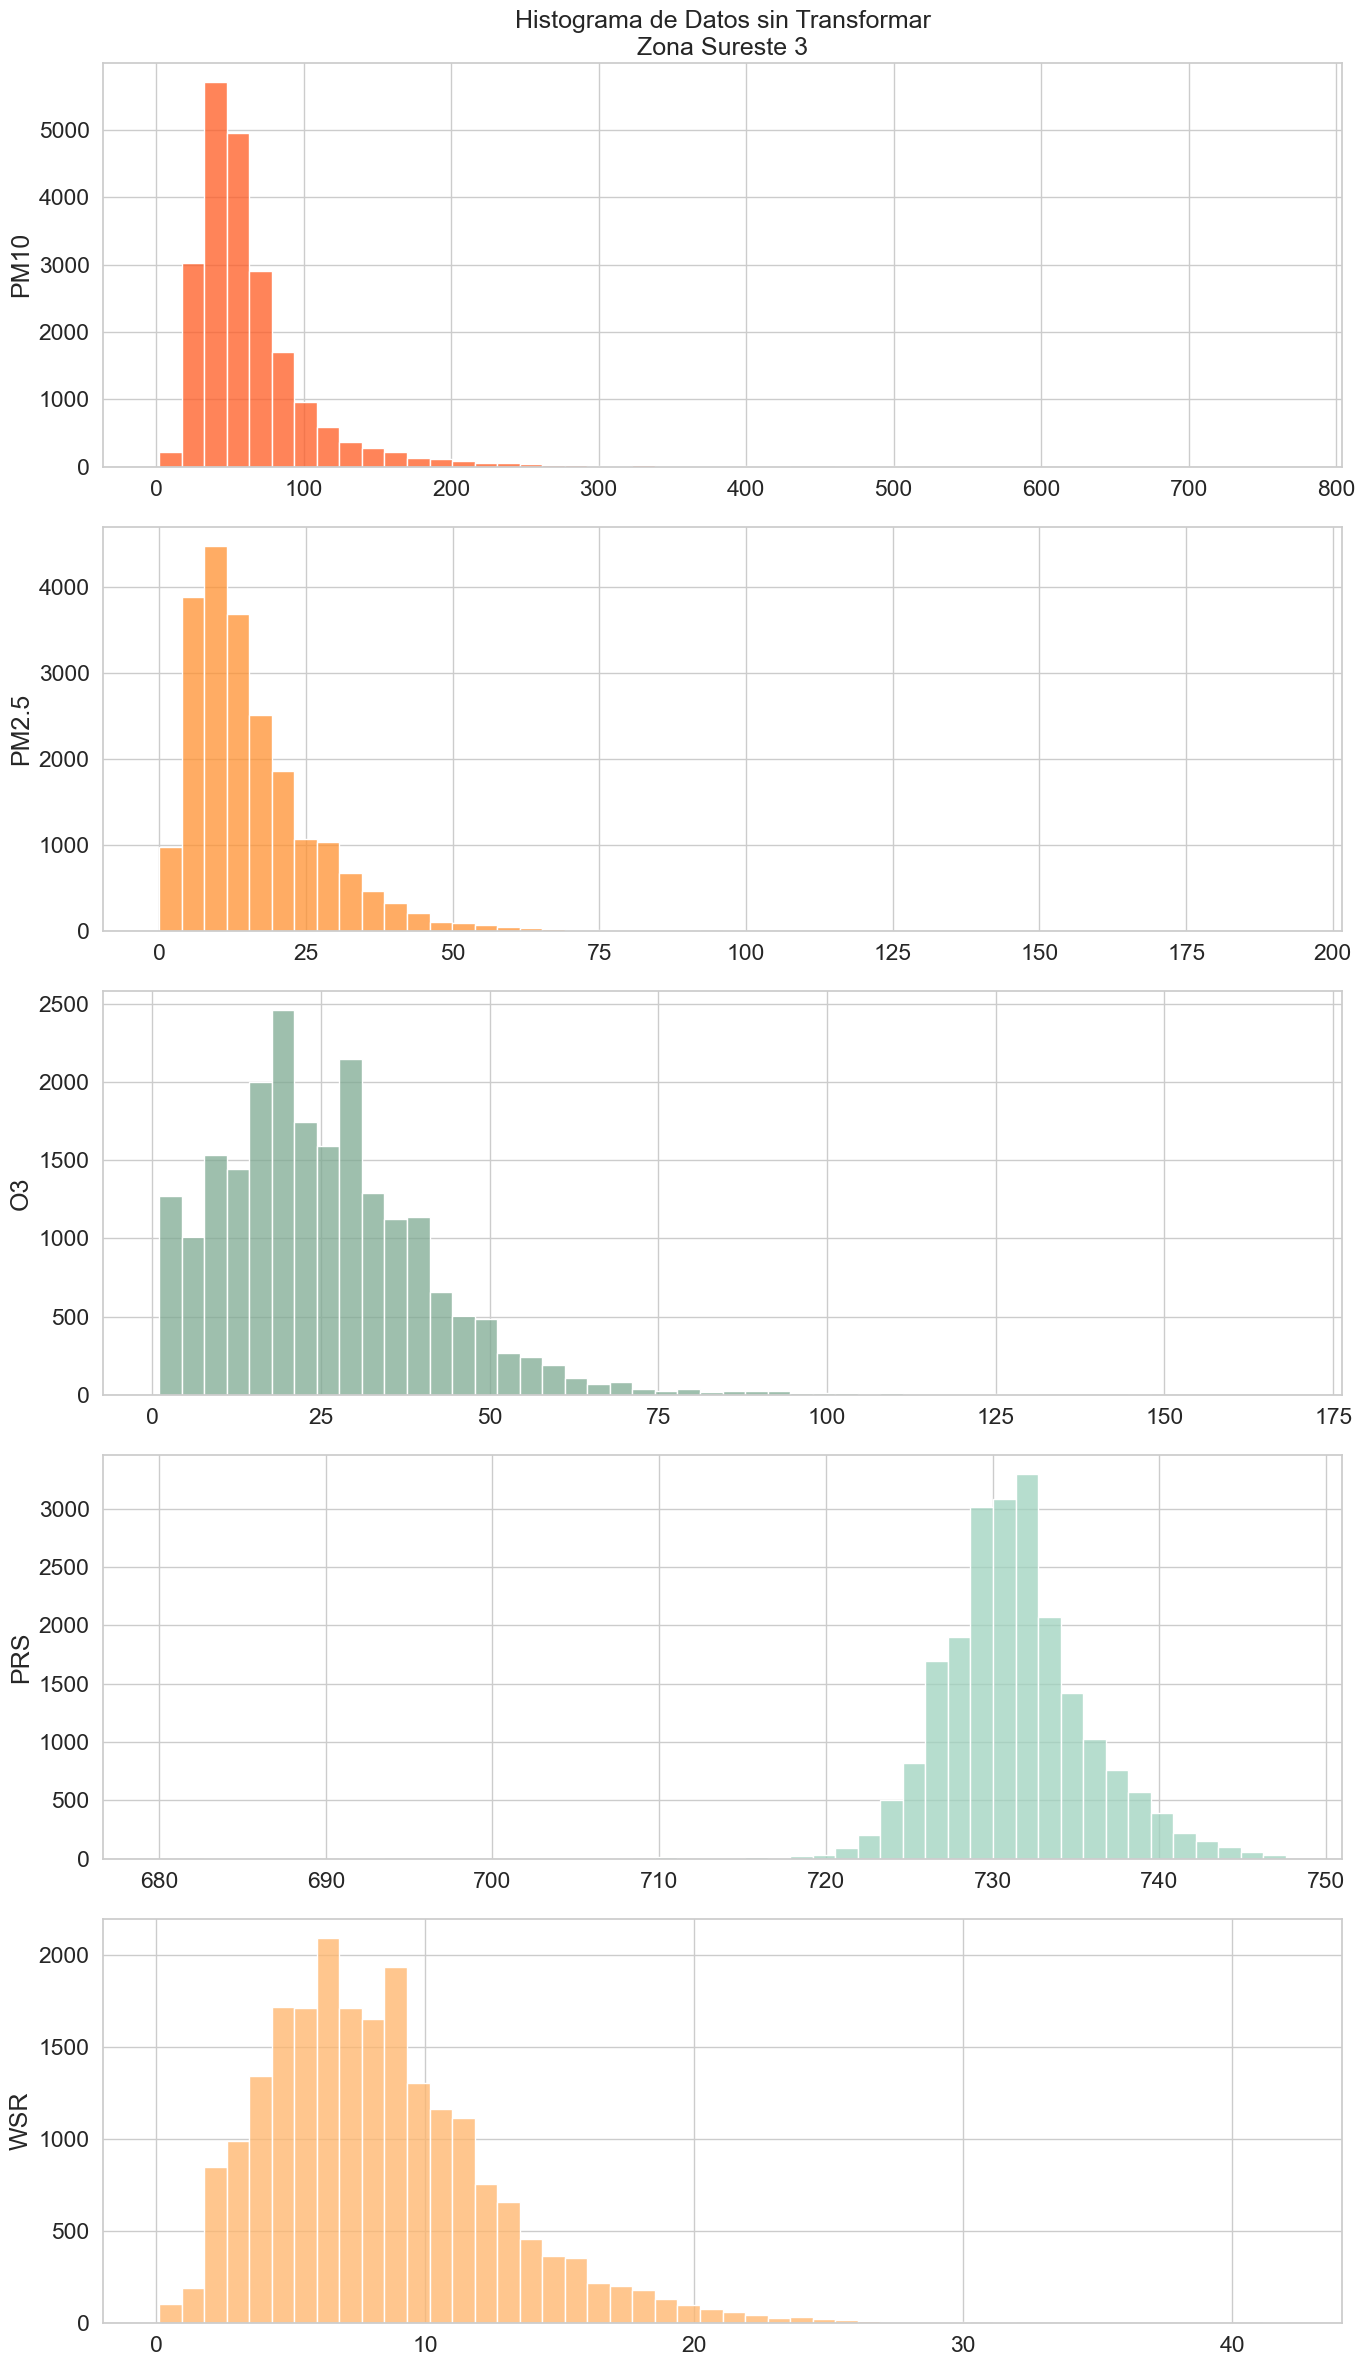

In [5]:
hist_plot(
    sureste3,
    interest_vars=INTEREST_VARS,
    title="Histograma de Datos sin Transformar\nZona Sureste 3",
)

### Datos Transformados

In [48]:
def yeo_johnson_transformation(df: pd.DataFrame) -> pd.DataFrame:
    transformer = PowerTransformer(method="yeo-johnson")

    new_df = df.copy()
    lambdas = dict()
    for variable in df.drop("date", axis=1):
        data = df[variable].to_numpy().reshape(-1, 1)

        transformer.fit(data)
        lambdas.update({variable: transformer.lambdas_[0]})

        new_df[variable] = transformer.transform(data).reshape(1, -1)[0]

    return new_df, lambdas

In [58]:
def log_transformation(df: pd.DataFrame) -> pd.DataFrame:
    new_df = df.copy()
    for variable in df.drop("date", axis=1):
        new_df[variable] = np.log(new_df[variable])

    return new_df

In [52]:
norte2_trans, lambdas_norte2 = yeo_johnson_transformation(norte2)
noroeste2_trans, lambdas_noroeste2 = yeo_johnson_transformation(noroeste2)
sureste3_trans, lambdas_sureste3 = yeo_johnson_transformation(sureste3)

norte2_trans

,date,O3,PM10,PM2.5,PRS,WSR
0,2021-03-01 01:00:00,-0.297922,1.428069,-2.180852,-7.771561e-16,-0.855087
1,2021-03-01 02:00:00,-1.050498,1.428069,-1.314795,-7.771561e-16,-0.718267
2,2021-03-01 03:00:00,-1.980969,1.428069,-1.314795,-8.326673e-16,-1.920101
3,2021-03-01 04:00:00,-2.268374,1.428069,-1.314795,-8.326673e-16,-2.413082
4,2021-03-01 05:00:00,-2.268374,1.428069,-1.314795,-8.049117e-16,-2.413082
...,...,...,...,...,...,...
21594,2023-08-17 19:00:00,0.443330,-0.261074,0.131804,-6.938894e-16,0.144726
21595,2023-08-17 20:00:00,0.210776,-0.595399,-0.908253,-5.828671e-16,0.660299
21596,2023-08-17 21:00:00,-0.214691,-0.555276,-1.410798,-4.996004e-16,0.116249
21597,2023-08-17 22:00:00,-0.060145,-0.366252,-1.058463,-3.330669e-16,0.502370


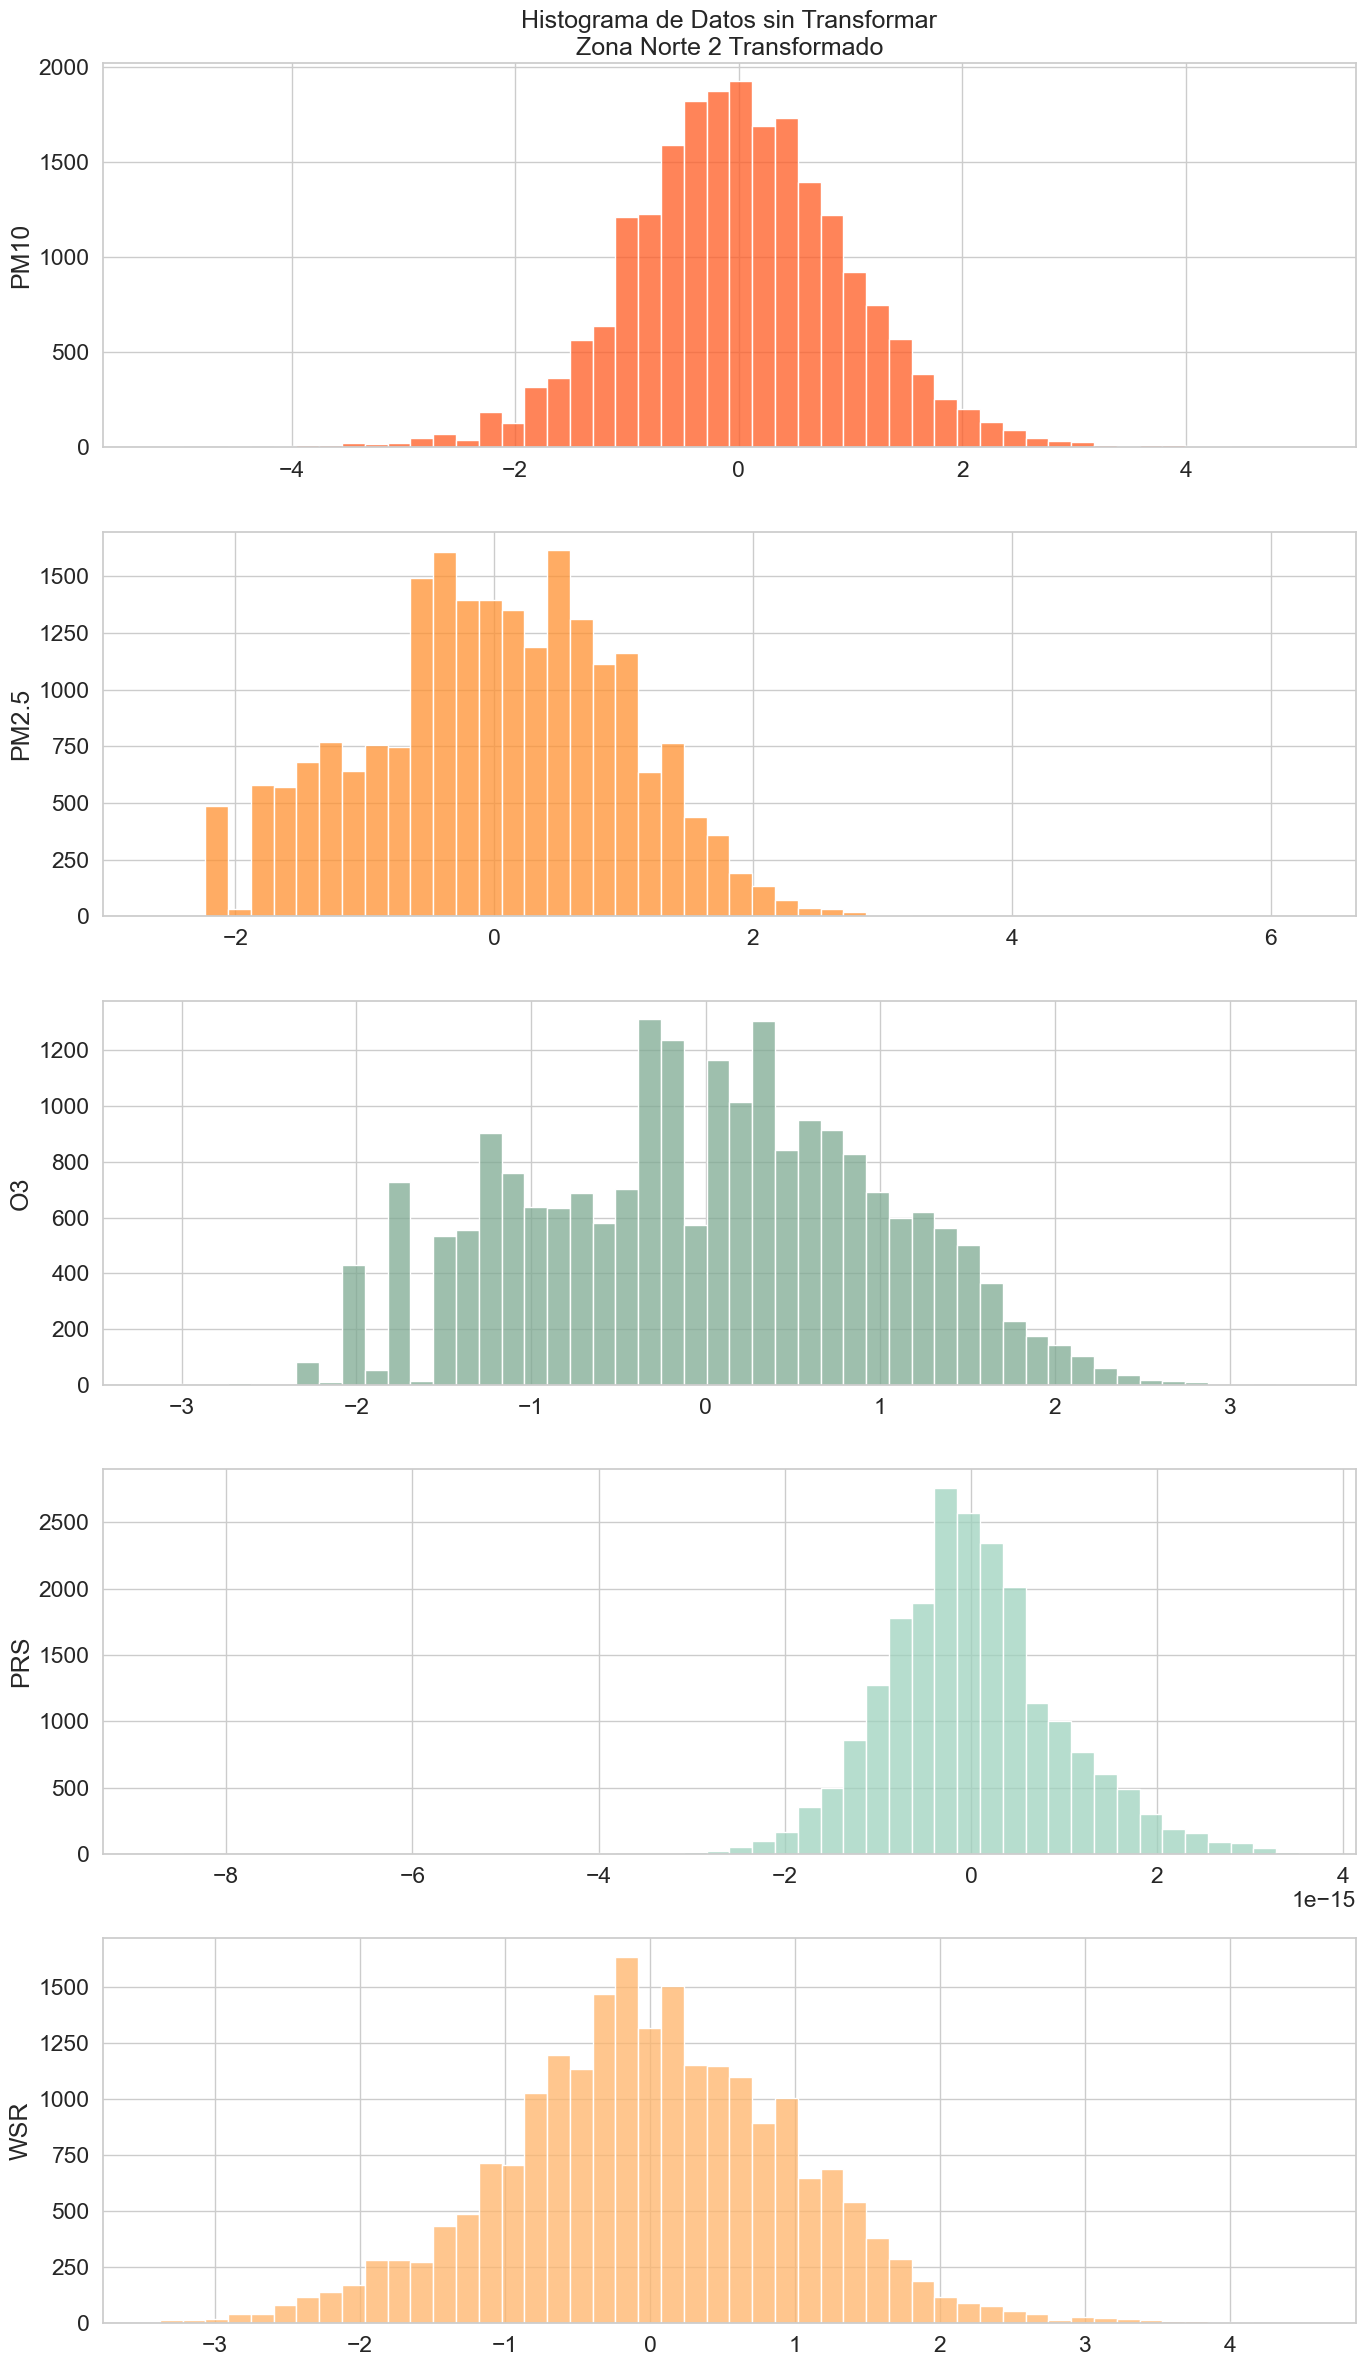

In [53]:
hist_plot(
    norte2_trans,
    interest_vars=INTEREST_VARS,
    title="Histograma de Datos sin Transformar\nZona Norte 2 Transformado",
)

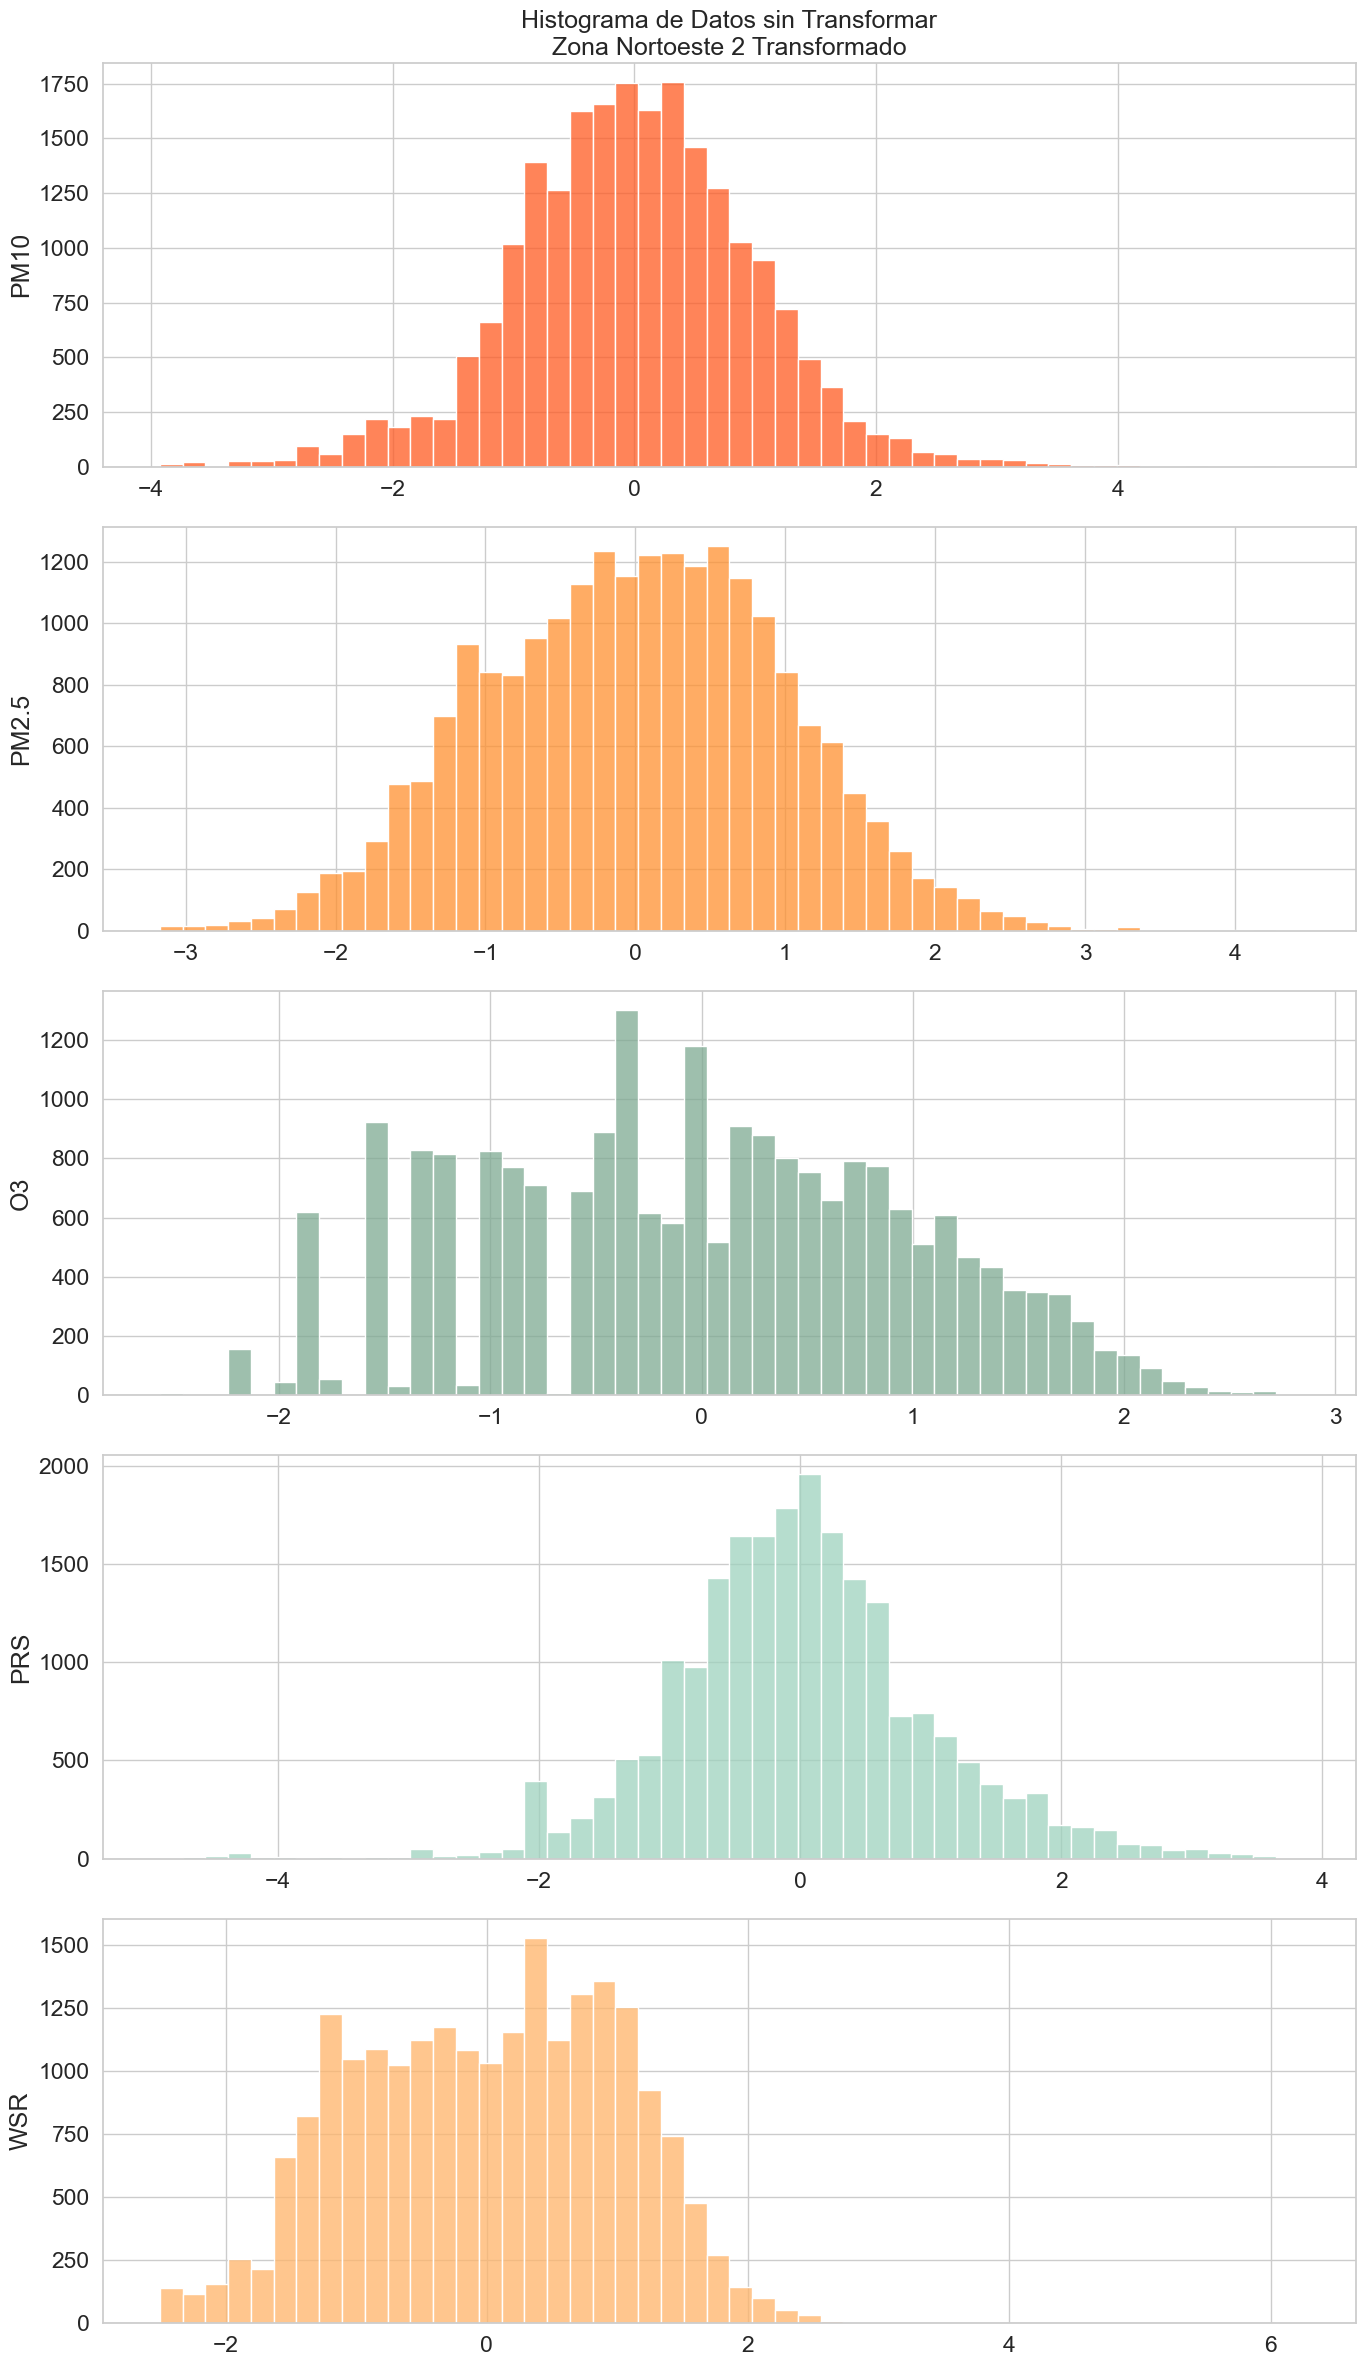

In [54]:
hist_plot(
    noroeste2_trans,
    interest_vars=INTEREST_VARS,
    title="Histograma de Datos sin Transformar\nZona Nortoeste 2 Transformado",
)

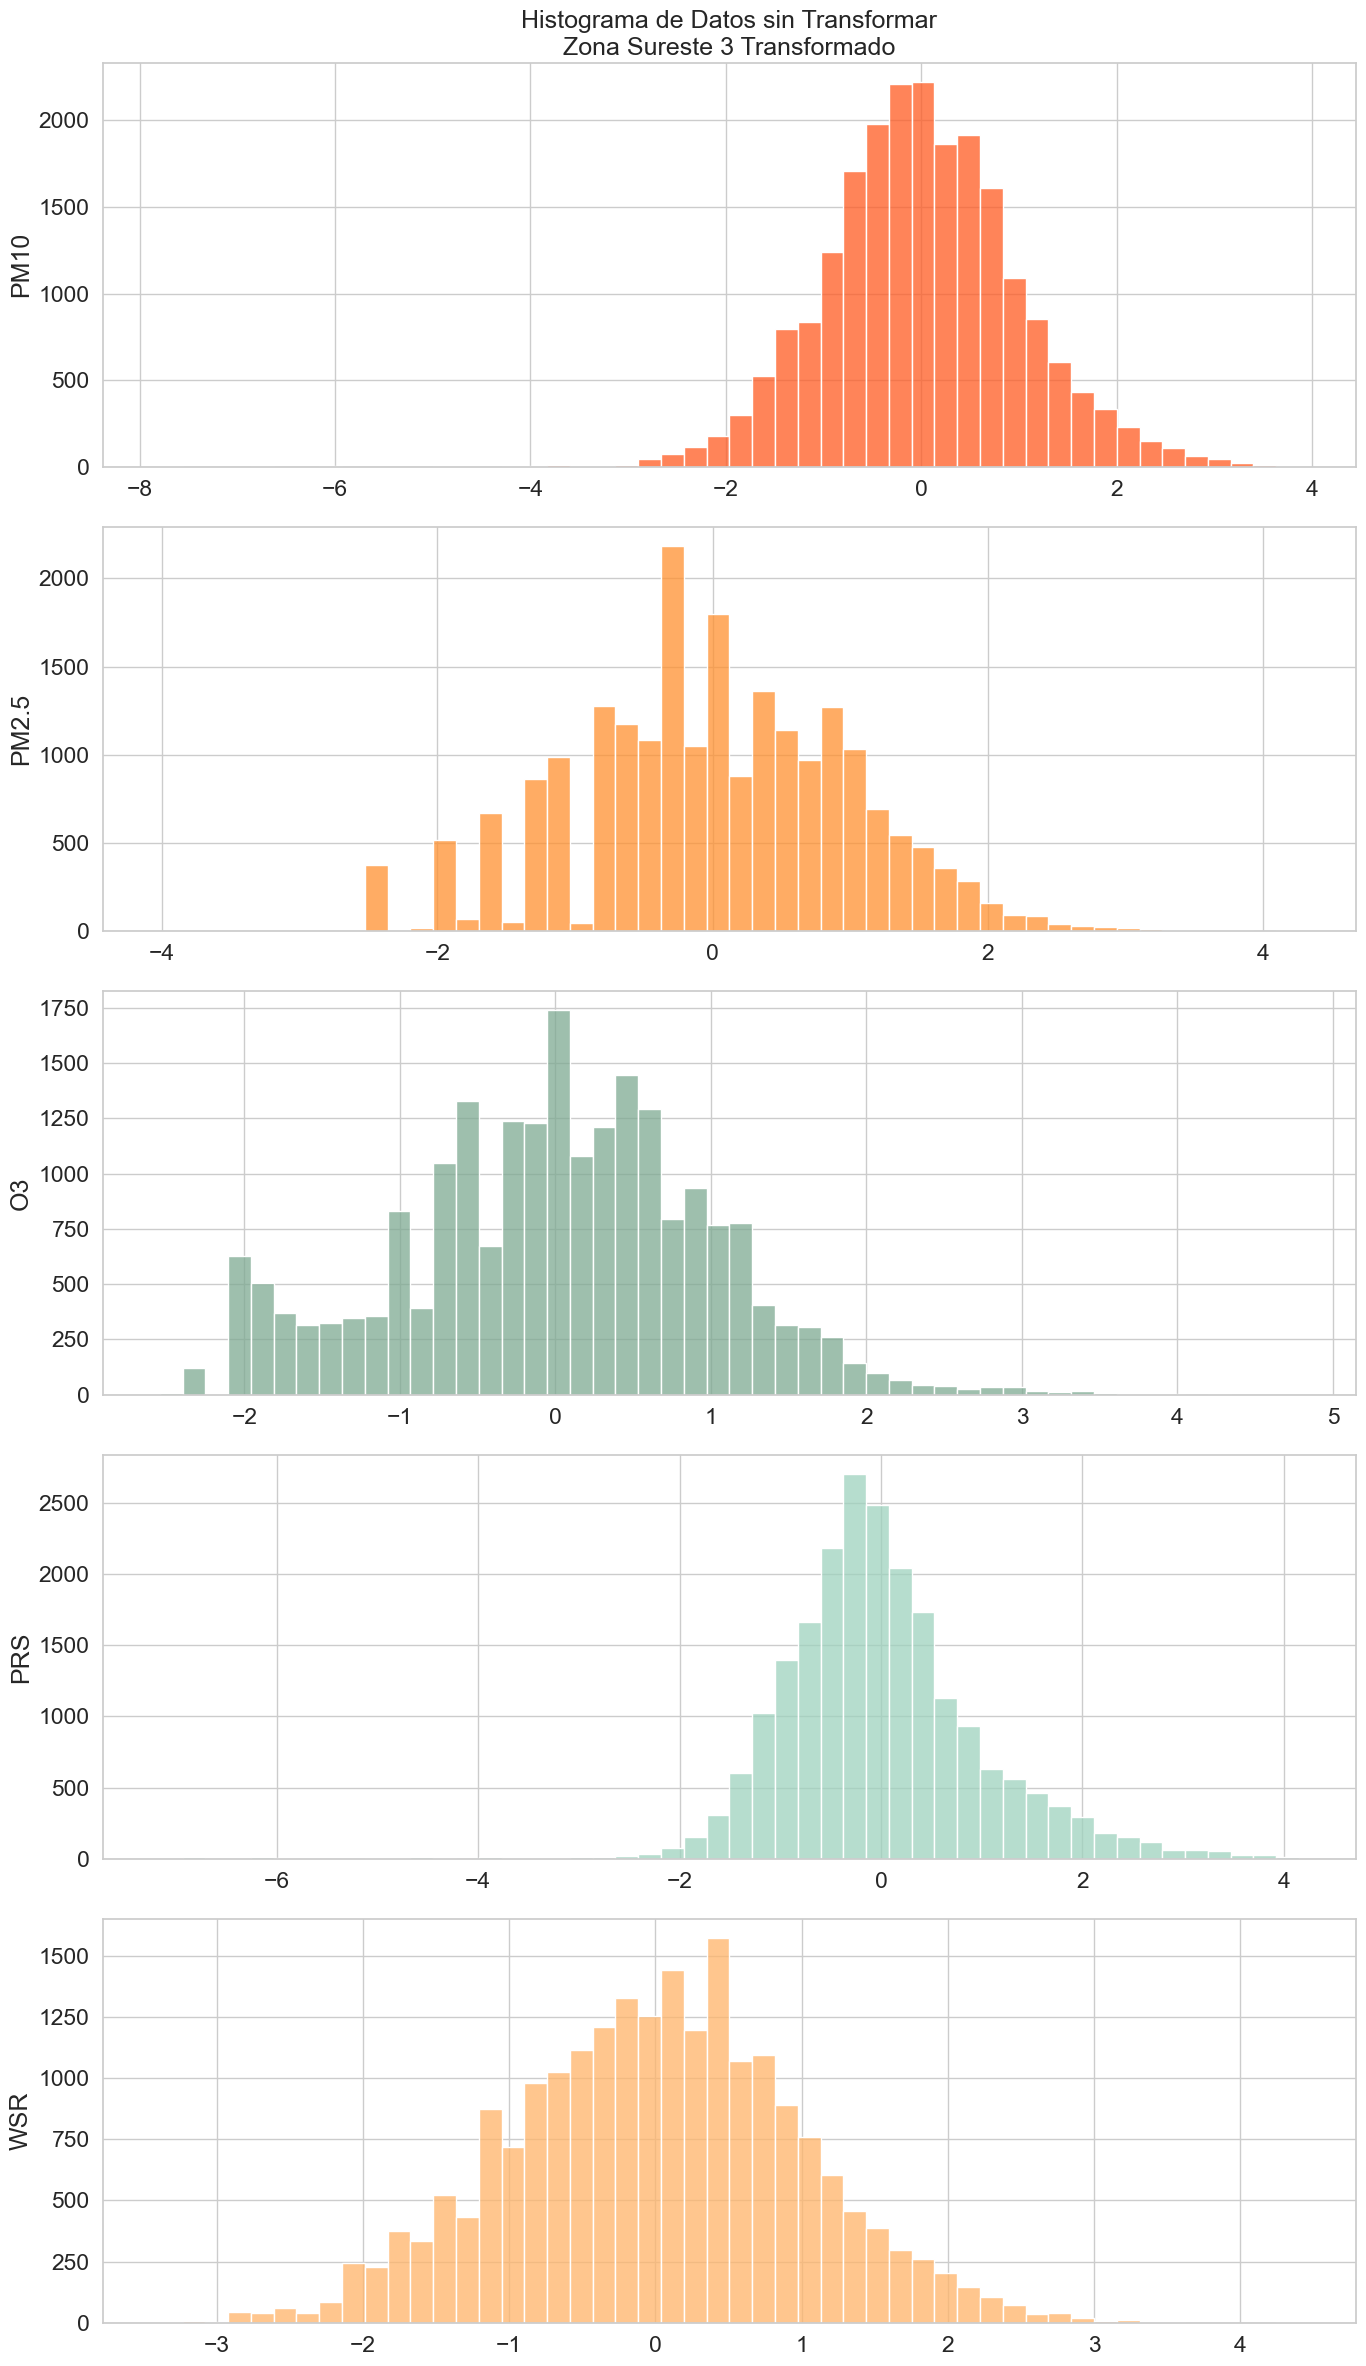

In [55]:
hist_plot(
    sureste3_trans,
    interest_vars=INTEREST_VARS,
    title="Histograma de Datos sin Transformar\nZona Sureste 3 Transformado",
)